In [85]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

test = pd.read_csv('./data/stratified_valid.csv')
test

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN
...,...,...,...
2332,j21246192N,547.30,NaN
2333,h-1554287F,26414.19,NaN
2334,A15262612g,2677.95,NaN
2335,W-2514493U,2213.63,NaN


In [76]:
k = 40
seed = 21

bins = np.linspace(test.target_reg.min(), test.target_reg.max(), k)
y_binned = np.4(test.target_reg, bins)
test['bin'] = y_binned
test.head()

,car_id,target_reg,num_fold,bin
0,y13744087j,9492.96,NaN,4
1,O41613818T,2656.23,NaN,1
2,d-2109686j,1526.11,NaN,1
3,u29695600e,1338.00,NaN,1
4,N-8915870N,825.72,NaN,1


/Users/vlados/Desktop/proga/ai/ai_env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


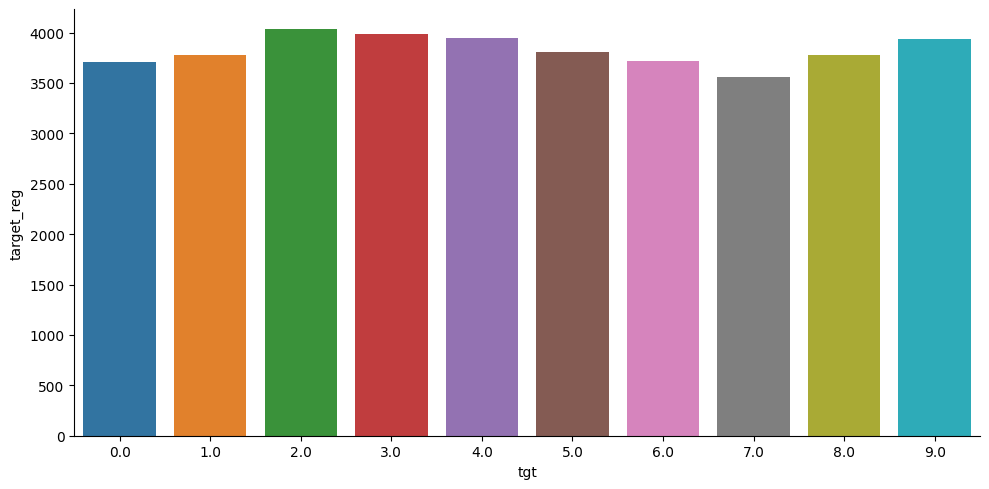

In [83]:
folder = StratifiedKFold(10)

tmp_t = test.copy(True)

tmp_t['target_reg'] = np.log(tmp_t.target_reg)

for i, (train_idx, test_idx) in enumerate(folder.split(tmp_t[['car_id', 'target_reg']], tmp_t['bin'])):
    tmp_t.loc[test_idx, 'tgt'] = i


test['tgt'] = tmp_t['tgt']
tmp = test.groupby('tgt', as_index=False)['target_reg'].agg('mean')

sns.catplot(data = tmp, x = 'tgt', y = 'target_reg', aspect=2, kind="bar");

In [93]:
test.tgt = test.tgt.astype(int)

In [94]:
test.groupby('tgt', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

147.82687296150536

In [98]:
test['num_fold'] = test.tgt
test[['car_id', 'target_reg', 'num_fold']].to_csv('2_4_6.csv', index=False)

In [97]:
test.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

147.82687296150536